<center>
<img src="university-of-portsmouth-logo.jpg",width="50", height="30" alt= "University of Portsmouth">
    </center>

Submission for **Machine Learning Developer** position<br>
By: Konark Karna

### Task 1 <br>
AI/ML approaches to cluster consumers based on the given data<br>
Propose any approach to collect consumer satisfaction data and use it to classify tasks and roles within each store.<br>
Are there any other possible measures to evaluate clients with respect to efficiency, roles, and activities?<br>

Please include the answer to the following test questions in your presentation:
Q1: For each client (or store):

    Q1.1: estimate (a) time spent, (b) infectiveness time i.e. time with no value added  (NVA), (c) pace (i.e. rate of task), and (d) efficiency for each task
    Q1.2: estimate the activity time, i.e., how long does a process/activity take?
    Q1.3: estimate the time spent on each category 


Q2: As in Q1 but considering all the clients together

Q3: Propose some solutions to reduce NVA and improve the efficiency of clients 

#### Key things:   
``Clients``: are retailers that ask advice from ReThink    
``Customers``: are people that buy goods from the retailers    
``Stores``: retail locations for the clients 


In [1]:
#importing essential Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Part 1. Reading Datasets

1. Data-Front End efficiency <br>
2. Data-Till Activity Study

Reading first dataset

In [2]:
df1 = pd.read_excel("Data Summary.xlsx",sheet_name="Data-Front End efficiency")
df1.head(10)

,Data Summary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Customer,NaN,NaN,Homebase,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Study,Location,Tags,Date,Day,Round,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Category,Notes,Timeslot
6,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Team Member 1,2534.0,Serve Customer at Till,100.0,5,1.0,Tills,Customer,NaN,NaN,Morning
7,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5,1.0,Collections Desk,Customer,NaN,NaN,Morning
8,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0,1.0,Collections Desk,NVA,Customer Count,NaN,Morning
9,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0,1.0,Tills,NVA,Customer Count,NaN,Morning


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Data Summary  3702 non-null   object
 1   Unnamed: 1    3701 non-null   object
 2   Unnamed: 2    1 non-null      object
 3   Unnamed: 3    3702 non-null   object
 4   Unnamed: 4    3701 non-null   object
 5   Unnamed: 5    3701 non-null   object
 6   Unnamed: 6    3701 non-null   object
 7   Unnamed: 7    3701 non-null   object
 8   Unnamed: 8    3701 non-null   object
 9   Unnamed: 9    3701 non-null   object
 10  Unnamed: 10   3701 non-null   object
 11  Unnamed: 11   3701 non-null   object
 12  Unnamed: 12   3701 non-null   object
 13  Unnamed: 13   3701 non-null   object
 14  Unnamed: 14   1068 non-null   object
 15  Unnamed: 15   275 non-null    object
 16  Unnamed: 16   3684 non-null   object
dtypes: object(17)
memory usage: 492.3+ KB


- As we can see, we have almost 5 ``NaN`` rows and each column has same ``object`` **datatype**. <br>
So first lets change **datatype** and skip ``NaN`` rows <br>

In [4]:
#creating ``dtype`` separately so that, if we would be required to make change, it can be done smoothly over here.
dtypes = {
    'Study':object,
    'Location': object,
    'Tags': object,
    'Date': object,
    'Day':object,
    'Round':object,
    'Role': object,
    'El Code':float,
    'Elements':object,
    'Rating':object,
    'BMS':float,
    'Qty':float,
    'Area':object,
    'Main Category':object,
    'Category':object,
    'Notes':object,
    'Timeslot':object
}

In [5]:
df1 = pd.read_excel("Data Summary.xlsx",sheet_name="Data-Front End efficiency", dtype=dtypes,skiprows=range(0,6))
df1.head()

,Study,Location,Tags,Date,Day,Round,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Category,Notes,Timeslot
0,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,NaN,NaN,Morning
1,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,NaN,NaN,Morning
2,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Customer Count,NaN,Morning
3,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Customer Count,NaN,Morning
4,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:52,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,NaN,NaN,Morning


In [6]:
df1['Date'].iloc[0],df1['Date'].iloc[-1]

('07/10/2019', '27/10/2019')

Reading second dataset i.e, Data-Till Activity Study

In [7]:
df2 = pd.read_excel("Data Summary.xlsx",sheet_name="Data-Till Activity Study")
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9940 entries, 0 to 9939
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Data Summary  9939 non-null   object
 1   Unnamed: 1    9939 non-null   object
 2   Unnamed: 2    7708 non-null   object
 3   Unnamed: 3    9939 non-null   object
 4   Unnamed: 4    9939 non-null   object
 5   Unnamed: 5    9939 non-null   object
 6   Unnamed: 6    9939 non-null   object
 7   Unnamed: 7    9939 non-null   object
 8   Unnamed: 8    9939 non-null   object
 9   Unnamed: 9    3206 non-null   object
 10  Unnamed: 10   9939 non-null   object
 11  Unnamed: 11   9939 non-null   object
 12  Unnamed: 12   9939 non-null   object
 13  Unnamed: 13   9939 non-null   object
 14  Unnamed: 14   9939 non-null   object
 15  Unnamed: 15   9939 non-null   object
 16  Unnamed: 16   1 non-null      object
 17  Unnamed: 17   627 non-null    object
 18  Unnamed: 18   9939 non-null   object
dtypes: obj

In [8]:
df2.head()

,Data Summary,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Study,Location,Tags,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Category,Notes,Timeslot
2,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0,0.0,NVA,NaN,NaN,Morning
3,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.062,0.062,0.062,Customer,NaN,NaN,Morning
4,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,NaN,NaN,Morning


As we can see, each column again has ``object`` datatype and first row is ``NaN`` and column names are in row below, so processing it better

In [9]:
dtypes = {
    'Study':object,
    'Location': object,
    'Tags': object,
    'Date': object,
    'Day':object,
    'Time':object,
    'Area': object,
    'Task':object,
    'Element':object,
    'UOM':object,
    'Rating':object,
    'Frquency':float,
    'Obs Time':float,
    'BMS':float,
    'BMs per UOM':float,
    'Main Category':object,
    'Category':object,
    'Notes': object,
    'Timeslot':object
}

In [10]:
df2 = pd.read_excel("Data Summary.xlsx",sheet_name="Data-Till Activity Study",skiprows=range(0,2),dtype=dtypes)
df2.head()

,Study,Location,Tags,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Category,Notes,Timeslot
0,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,NaN,NaN,Morning
1,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.0620,0.0620,0.0620,Customer,NaN,NaN,Morning
2,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,NaN,NaN,Morning
3,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),NaN,100.0,1.0,0.1262,0.1262,0.1262,Customer,NaN,NaN,Morning
4,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,NaN,2,Morning


# Part 2: Early Stage of Data Exploration

#### Exploring columns of the first dataset `df1`

In [11]:
df1.head()

,Study,Location,Tags,Date,Day,Round,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Category,Notes,Timeslot
0,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,NaN,NaN,Morning
1,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,NaN,NaN,Morning
2,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Customer Count,NaN,Morning
3,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Customer Count,NaN,Morning
4,StGW0710ras3,Stamford,NaN,07/10/2019,Monday,10:52,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,NaN,NaN,Morning


- ``Tags`` contains null values, and `Notes` are quite varied with highest as ``8`` occurence for **fetch**. So, dropping them.
- Also, ``Study`` has alphanumeric characters in it (for anonymization). Therefore, not relevant - dropping it.
- In addition, ``Category`` column has 1067 customer-count and remaining as ``null``. So dropping it too.

In [12]:
df1.drop(['Study','Tags','Category','Notes'], axis=1, inplace=True)

Replacing name of column ``Round`` with ``Time``

In [13]:
df1.rename(columns={"Round":"Time"},inplace=True)

In [14]:
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot
0,Stamford,07/10/2019,Monday,10:47,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning
1,Stamford,07/10/2019,Monday,10:47,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning
2,Stamford,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning
3,Stamford,07/10/2019,Monday,10:47,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning
4,Stamford,07/10/2019,Monday,10:52,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning


#### Now, lets see what can be dropped easily from ``df2``

In [15]:
df2.head()

,Study,Location,Tags,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Category,Notes,Timeslot
0,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,NaN,NaN,Morning
1,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.0620,0.0620,0.0620,Customer,NaN,NaN,Morning
2,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,NaN,NaN,Morning
3,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),NaN,100.0,1.0,0.1262,0.1262,0.1262,Customer,NaN,NaN,Morning
4,BrJC1708dots1,Bristol Emerson Green,SAG D,17/08/2021,Tuesday,10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,NaN,2,Morning


From exploration, we get to know ``Tags`` corresponds to ``LOCATION``, we can drop ``Tags``<br>
``Study`` has alphanumeric charaters, ``Notes`` are varied n trivial, ``Category`` has null values<br>
So, ``Study``, ``Tags``, ``Notes`` and ``Category`` can be dropped

In [16]:
df2.drop(['Study','Tags','Notes','Category'], axis=1,inplace=True)
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot
0,Bristol Emerson Green,17/08/2021,Tuesday,10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning
1,Bristol Emerson Green,17/08/2021,Tuesday,10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning
2,Bristol Emerson Green,17/08/2021,Tuesday,10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning
3,Bristol Emerson Green,17/08/2021,Tuesday,10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),NaN,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning
4,Bristol Emerson Green,17/08/2021,Tuesday,10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning


### We need to create a column named ``Time Taken`` to understand how long it takes for a specific task<br>
#### To do that we following data pre-processing

In [17]:
from datetime import timedelta
df1['Time'] = pd.to_datetime(df1['Date'] + ' ' + df1['Time'])
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot
0,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning
1,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning
4,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning


In [18]:
#creating new column 'Time Taken'
df1['Time Taken'] = df1.groupby('Date')['Time'].diff().dt.total_seconds() / 60

In [19]:
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken
0,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning,NaN
1,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0
4,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0


In [20]:
df1['Time Taken'].value_counts()

 0.0      2718
 5.0       960
 20.0        2
 10.0        2
 15.0        2
-365.0       1
 35.0        1
-355.0       1
-360.0       1
 6.0         1
-499.0       1
Name: Time Taken, dtype: int64

In [21]:
df1.drop(df1.index[df1['Time Taken'] < 0], inplace=True)
df1['Time Taken'].value_counts()

0.0     2718
5.0      960
20.0       2
10.0       2
15.0       2
35.0       1
6.0        1
Name: Time Taken, dtype: int64

### Again, creating ``Time Taken`` column, for ``df2`` now

In [22]:
from datetime import timedelta
df2['Time'] = pd.to_datetime(df2['Date'] + ' ' + df2['Time'])
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),NaN,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning


In [23]:
#here, we have time in seconds, so coding accordingly
df2['Time Taken'] = df2.groupby('Date')['Time'].diff()//timedelta(seconds=1)
df2['Time Taken'] = df2['Time Taken'].apply(lambda x: x/60) #as BMS is in minutes time taken should be minutes
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot,Time Taken
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning,NaN
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning,0.116667
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning,0.066667
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),NaN,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning,0.050000
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning,0.133333


   # Solution to question 1 (a)
   ## Estimation of Time spent at each store
 

###### Estimating Time at each store from the data coming from first dataset - Front End efficiency

In [24]:
Time_at_location_from_df1 = df1[['Location','Time Taken']]
Time_at_location_from_df1 = Time_at_location_from_df1.groupby(['Location']).sum()
Time_at_location_from_df1['Time Taken (in HH:MM)'] = pd.to_datetime(Time_at_location_from_df1['Time Taken'],unit='m').dt.strftime('%H:%M')

In [25]:
Time_at_location_from_df1

,Time Taken,Time Taken (in HH:MM)
Location,,
Ashbourne,470.0,07:50
Bracknell,1315.0,21:55
Chichester,751.0,12:31
Kidderminster,840.0,14:00
Leicester,885.0,14:45
Stamford,670.0,11:10


##### Estimating Time at each stores from the data coming from second dataset - Data-Till Activity

In [26]:
Time_at_location_from_df2 = df2[['Location','Time Taken']]
Time_at_location_from_df2 = Time_at_location_from_df2.groupby(['Location']).sum()
Time_at_location_from_df2['Time Taken (in HH:MM)'] = pd.to_datetime(Time_at_location_from_df2['Time Taken'],unit='m').dt.strftime('%H:%M')

In [27]:
Time_at_location_from_df2

,Time Taken,Time Taken (in HH:MM)
Location,,
Bristol Bradley Stoke,1049.733333,17:29
Bristol Broadmead,941.016667,15:41
Bristol Clifton Queen Rd,875.433333,14:35
Bristol Cribbs Causeway,639.500000,10:39
Bristol Emerson Green,1198.700000,19:58
Bristol Henleaze,466.383333,07:46


## Question 1 (b) : For Each Store
### infectiveness time i.e. time with no value added  (NVA)

In [28]:
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken
0,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning,NaN
1,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0
4,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0


Time for no value added is ``NVA`` under column ``Main Category``. So to get total time for each store as ``NVA``, we need to do following :

In [29]:
# First selecting only those rows that have NVA as Main Category
nva_at_location_from_df1 = df1[df1["Main Category"] == "NVA"]
#nva_at_location_from_df1.head()

In [30]:
#second creating a df from clearer groupby
nva_at_location_from_df1 = nva_at_location_from_df1[['Location','Main Category','Time Taken']]

#groupbying location
nva_at_location_from_df1 = nva_at_location_from_df1.groupby(['Location']).sum()

In [31]:
# As we have 'Time Taken in DF1' in minutes, lets convert it to HH:MM for clearer understanding
nva_at_location_from_df1['Time Taken (in HH:MM)'] = pd.to_datetime(nva_at_location_from_df1['Time Taken'], unit='m').dt.strftime('%H:%M')

nva_at_location_from_df1

,Time Taken,Time Taken (in HH:MM)
Location,,
Ashbourne,105.0,01:45
Bracknell,115.0,01:55
Chichester,135.0,02:15
Kidderminster,710.0,11:50
Leicester,100.0,01:40
Stamford,55.0,00:55


In [32]:
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot,Time Taken
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning,NaN
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning,0.116667
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning,0.066667
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),NaN,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning,0.050000
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning,0.133333


In [33]:
# First selecting only those rows that have NVA as Main Category
nva_at_location_from_df2 = df2[df2["Main Category"] == "NVA"]
#nva_at_location_from_df2.head()

In [34]:
#second creating a df from clearer groupby
nva_at_location_from_df2 = nva_at_location_from_df2[['Location','Main Category','Time Taken']]

#groupbying location
nva_at_location_from_df2 = nva_at_location_from_df2.groupby(['Location']).sum()

In [35]:
#as we have 'Time Taken' in df2 in seconds, lets convert it into HH:MM for clearer understanding
nva_at_location_from_df2['Time Taken (in HH:MM)'] = pd.to_datetime(nva_at_location_from_df2['Time Taken'], unit='m').dt.strftime('%H:%M')

nva_at_location_from_df2

,Time Taken,Time Taken (in HH:MM)
Location,,
Bristol Bradley Stoke,3.833333,00:03
Bristol Broadmead,257.033333,04:17
Bristol Clifton Queen Rd,91.250000,01:31
Bristol Cribbs Causeway,233.000000,03:53
Bristol Emerson Green,176.366667,02:56
Bristol Henleaze,254.183333,04:14


## Question 1 (c) : For Each Store
### estimate pace (i.e. rate of task)
### This is same as 
## Question 1.2 : For each Store
### estimate the activity time, i.e., how long does a process/activity take?

In [36]:
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken
0,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning,NaN
1,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0
4,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0


Here, ``El Code`` is the 'code of activity' and <br>
``Elements`` is 'description of the activity based on the observation by the Rethink staff' <br>
- We can use any of them to estimate time taken on average

In [37]:
counts= df1['Elements'].value_counts()
counts

Serve Customer at Till                         1234
Customer Count                                 1067
Admin at Till                                   316
Wait No Customer                                263
Serve Customer at Collections/Click&Collect     175
Break                                           137
Assist Customer in Store                        115
Return Product to Sale                           84
Tidy till area                                   50
Get Product for Customer                         44
Talk Work NOTE who and topic                     41
Returns/ Exchanges/ Repairs at Till              33
Facing Up - away from till area                  32
Telephone                                        18
Talk Not Work                                    16
Personal Needs                                   14
Product Carry & Collect from car                 13
Not Working                                      11
Serve Customer with DPD parcel                    9
Team Briefin

In [38]:
#as we want to keep dataset as original as possible for the modelling purposes later

df1_1 = df1[~df1['Elements'].isin(counts[counts < 10].index)]
df1_1['Elements'].value_counts()

Serve Customer at Till                         1234
Customer Count                                 1067
Admin at Till                                   316
Wait No Customer                                263
Serve Customer at Collections/Click&Collect     175
Break                                           137
Assist Customer in Store                        115
Return Product to Sale                           84
Tidy till area                                   50
Get Product for Customer                         44
Talk Work NOTE who and topic                     41
Returns/ Exchanges/ Repairs at Till              33
Facing Up - away from till area                  32
Telephone                                        18
Talk Not Work                                    16
Personal Needs                                   14
Product Carry & Collect from car                 13
Not Working                                      11
Name: Elements, dtype: int64

In [39]:
pace_from_df1 = df1_1[['Location', 'Elements','Time Taken']]
pace_from_df1

,Location,Elements,Time Taken
0,Stamford,Serve Customer at Till,NaN
1,Stamford,Serve Customer at Collections/Click&Collect,0.0
2,Stamford,Customer Count,0.0
3,Stamford,Customer Count,0.0
5,Stamford,Serve Customer at Collections/Click&Collect,0.0
...,...,...,...
3695,Leicester,Facing Up - away from till area,0.0
3696,Leicester,Admin at Till,5.0
3697,Leicester,Return Product to Sale,0.0
3698,Leicester,Admin at Till,5.0


In [40]:
avg_pace_from_df1 = pace_from_df1.groupby(['Location','Elements']).mean().round(2)
avg_pace_from_df1

Time Taken
Location  Elements                                               
Ashbourne Admin at Till                                      1.09
          Assist Customer in Store                           3.00
          Customer Count                                     0.00
          Facing Up - away from till area                    0.00
          Get Product for Customer                           0.00
...                                                           ...
Stamford  Return Product to Sale                             1.18
          Serve Customer at Collections/Click&Collect        1.33
          Serve Customer at Till                             2.49
          Tidy till area                                     5.00
          Wait No Customer                                   2.12

[85 rows x 1 columns]

In [41]:
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot,Time Taken
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning,NaN
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,NaN,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning,0.116667
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,NaN,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning,0.066667
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),NaN,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning,0.050000
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning,0.133333


In [42]:
counts = df2['Element'].value_counts()
counts

Wait No Customers                                 1716
Call Up Next Customer & Start Transaction         1376
Ask re Receipt / Change to Customer               1012
Scan items (without bagging) - Number of Items     996
Take a payment (Contactless Card)                  855
                                                  ... 
Apply an App based offer (e.g. double points)        1
Price overrides                                      1
After payment till prompts e.g. coupons              1
Selling a gift voucher                               1
Staff Discount Card                                  1
Name: Element, Length: 87, dtype: int64

In [43]:
df2_2 = df2[~df2['Element'].isin(counts[counts < 10].index)]
df2_2['Element'].value_counts()

Wait No Customers                                                          1716
Call Up Next Customer & Start Transaction                                  1376
Ask re Receipt / Change to Customer                                        1012
Scan items (without bagging) - Number of Items                              996
Take a payment (Contactless Card)                                           855
Waiting for Customer to put change /recepits away at end of transaction     827
Determine Customer Requirements                                             503
Scan & Bag Item(s) - Number of Items                                        384
Request & Process Advantage Card (Chip)                                     358
Take Payment (Card)                                                         205
Take Payment (Cash)                                                         170
Request & Process Advantage Card (Phone scan)                               138
Determine Customer Requirements / make r

In [44]:
pace_from_df2 = df2_2[['Location', 'Element','Time Taken']]
pace_from_df2

,Location,Element,Time Taken
0,Bristol Emerson Green,Wait No Customers,NaN
1,Bristol Emerson Green,Call Up Next Customer & Start Transaction,0.116667
2,Bristol Emerson Green,Determine Customer Requirements,0.066667
3,Bristol Emerson Green,Request & Process Advantage Card (Chip),0.050000
4,Bristol Emerson Green,Scan & Bag Item(s) - Number of Items,0.133333
...,...,...,...
9933,Bristol Clifton Queen Rd,Scan items (without bagging) - Number of Items,0.100000
9934,Bristol Clifton Queen Rd,Take a payment (Contactless Card),0.133333
9935,Bristol Clifton Queen Rd,Ask re Receipt / Change to Customer,0.150000
9936,Bristol Clifton Queen Rd,Waiting for Customer to put change /recepits a...,0.116667


In [45]:
#AS df2 is in seconds, we are getting it in seconds,
#so, we will round it up in seconds later
avg_pace_from_df2 = pace_from_df2.groupby(['Location','Element']).mean().round()
avg_pace_from_df2

Time Taken
Location              Element                                                       
Bristol Bradley Stoke Ask re Receipt / Change to Customer                        0.0
                      Assist SCO Customer - Advantage Card                       1.0
                      Assist SCO Customer - Approval                             1.0
                      Assist SCO Customer - Other - please note                  1.0
                      Assist SCO Customer - Payment                              0.0
...                                                                              ...
Bristol Henleaze      Take Payment (Card)                                        0.0
                      Take Payment (Cash)                                        0.0
                      Take a payment (Contactless Card)                          0.0
                      Wait No Customers                                          6.0
                      Waiting for Customer to put change /recepits aw...         0.0

[148 rows x 1 columns]

## Question 1 (d) : For Each Store
### efficiency for each task

In [46]:
df1 = df1.fillna(0) #It will fill NaN in 'Time Taken' with 0
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken
0,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning,0.0
1,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0
4,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0


As **BMS** - Benchmark minutes which is a kind average time for activities<br>
we can substract, ``Time Taken`` from ``BMS`` to get efficient for that row (need to create new column). <br>
Eventually, <br>
we can groupby ``Location``, ``Elements`` and get **mean** of efficiency to see if that store is on average efficient at task

In [47]:
df1['Efficiency'] = df1['BMS'] - df1['Time Taken']
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning,0.0,5.0
1,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0,5.0
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0,0.0
4,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0,0.0


In [48]:
eff_from_df1 = df1[['Location','Elements','Efficiency']]
eff_from_df1

,Location,Elements,Efficiency
0,Stamford,Serve Customer at Till,5.00
1,Stamford,Serve Customer at Collections/Click&Collect,5.00
2,Stamford,Customer Count,0.00
3,Stamford,Customer Count,0.00
4,Stamford,Deal with Store Visit RM / AM etc,0.00
...,...,...,...
3695,Leicester,Facing Up - away from till area,3.75
3696,Leicester,Admin at Till,0.00
3697,Leicester,Return Product to Sale,3.75
3698,Leicester,Admin at Till,0.00


In [49]:
#This reveals stores at those locations are efficient by x minutes (in case of positive number)
#This reveals stores at those locations are inefficient by x minutes (in case of negative number)

eff_from_df1 = eff_from_df1.groupby(['Location','Elements']).mean().round(2)
eff_from_df1

Efficiency
Location  Elements                                   
Ashbourne Admin at Till                          3.41
          Assist Customer in Store               2.00
          Customer Count                         0.00
          Facing Up - away from till area        4.50
          Get Product for Customer               5.00
...                                               ...
Stamford  Serve Customer at Till                 2.54
          Serve Customer with DPD parcel         0.00
          Tidy till area                        -0.88
          Training                               1.67
          Wait No Customer                      -2.12

[100 rows x 1 columns]

#### Now, getting efficiency from df2

In [50]:
df2 =df2.fillna(0)
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot,Time Taken
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning,0.000000
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,0,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning,0.116667
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,0,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning,0.066667
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),0,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning,0.050000
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning,0.133333


Again, <br>
As **BMS** - Benchmark minutes which is a kind average time for activities<br>
we can substract, ``Time Taken`` from ``BMS`` to get efficient for that row (need to create new column). <br>
Eventually, <br>
we can groupby ``Location``, ``Elements`` and get **mean** of efficiency to see if that store is on average efficient at task

In [51]:
df2['Efficiency'] = df2['BMS'] - df2['Time Taken']
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot,Time Taken,Efficiency
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning,0.000000,0.000000
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,0,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning,0.116667,-0.054667
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,0,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning,0.066667,-0.011367
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),0,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning,0.050000,0.076200
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning,0.133333,0.098467


In [52]:
eff_from_df2 = df2[['Location','Element','Efficiency']]
eff_from_df2

,Location,Element,Efficiency
0,Bristol Emerson Green,Wait No Customers,0.000000
1,Bristol Emerson Green,Call Up Next Customer & Start Transaction,-0.054667
2,Bristol Emerson Green,Determine Customer Requirements,-0.011367
3,Bristol Emerson Green,Request & Process Advantage Card (Chip),0.076200
4,Bristol Emerson Green,Scan & Bag Item(s) - Number of Items,0.098467
...,...,...,...
9933,Bristol Clifton Queen Rd,Scan items (without bagging) - Number of Items,0.027600
9934,Bristol Clifton Queen Rd,Take a payment (Contactless Card),0.018967
9935,Bristol Clifton Queen Rd,Ask re Receipt / Change to Customer,-0.031200
9936,Bristol Clifton Queen Rd,Waiting for Customer to put change /recepits a...,-0.038567


In [53]:
eff_from_df2 = eff_from_df2.groupby(['Location','Element']).mean().round(0)
eff_from_df2

Efficiency
Location              Element                                                       
Bristol Bradley Stoke Add points to Advantage Card manually                      0.0
                      After Sales Chat                                           0.0
                      Alert - New order on till                                 -1.0
                      Apply an App based offer (e.g. double points)             -0.0
                      Ask re Receipt / Change to Customer                       -0.0
...                                                                              ...
Bristol Henleaze      Take a payment (Contactless Card)                          0.0
                      Talk Work NOTE who and topic                              49.0
                      Wait No Customers                                         -6.0
                      Wait for Customer to Get Product                           1.0
                      Waiting for Customer to put change /recepits aw...         0.0

[236 rows x 1 columns]

This reveals stores at those locations are efficient by x minutes (in case of positive number)<br>
This reveals stores at those locations are inefficient by x minutes (in case of negative number)

# Q1.3: For each store<br>
### estimate the time spent on each category 

#### we have already created ``pace_from_df1`` & ``pace_from_df2`` when we were finding out average time rate of task <br>
so using them, we can find time spend on each category for each store

In [54]:
est_time_from_df1 = pace_from_df1.groupby(['Location','Elements']).sum() 
#as 'Time Taken' is in minutes, we get estimated time spent on each category in minutes

est_time_from_df1

Time Taken
Location  Elements                                               
Ashbourne Admin at Till                                      25.0
          Assist Customer in Store                           30.0
          Customer Count                                      0.0
          Facing Up - away from till area                     0.0
          Get Product for Customer                            0.0
...                                                           ...
Stamford  Return Product to Sale                             20.0
          Serve Customer at Collections/Click&Collect        20.0
          Serve Customer at Till                            455.0
          Tidy till area                                     20.0
          Wait No Customer                                   55.0

[85 rows x 1 columns]

In [55]:
#similarly
est_time_from_df2 = pace_from_df2.groupby(['Location','Element']).sum()
#as 'Time Taken' is in minutes now, we get estimated time spent on each category in minutes
est_time_from_df2

Time Taken
Location              Element                                                       
Bristol Bradley Stoke Ask re Receipt / Change to Customer                  14.683333
                      Assist SCO Customer - Advantage Card                 13.400000
                      Assist SCO Customer - Approval                       38.283333
                      Assist SCO Customer - Other - please note            41.350000
                      Assist SCO Customer - Payment                        12.933333
...                                                                              ...
Bristol Henleaze      Take Payment (Card)                                   1.766667
                      Take Payment (Cash)                                   0.716667
                      Take a payment (Contactless Card)                     6.250000
                      Wait No Customers                                   252.750000
                      Waiting for Customer to put change /recepits aw...    1.183333

[148 rows x 1 columns]

# Q2: As in Q1 but considering all the clients together

So, for all store, we need to find <br>
(a) time spent <br>
(b) infectiveness time i.e. time with no value added  (NVA)<br>
(c) pace (i.e. rate of task), and (d) efficiency for each task **or** Q1.2: estimate the activity time, i.e., how long does a process/activity take? <br>
Q1.3: estimate the time spent on each category 

### (a) Time spent <br>
we have already calculated separately this coming frome each ``df1`` and ``df2`` as : <br>
``Time_at_location_from_df1`` and ``Time_at_location_from_df2``

In [56]:
total_time_at_location = pd.concat([Time_at_location_from_df1,Time_at_location_from_df2])

#we can drop 'Time Taken' column as elements have minutes and seconds coming from df1 and df2, respectively
total_time_at_location = total_time_at_location.drop(['Time Taken'], axis=1)
total_time_at_location

,Time Taken (in HH:MM)
Location,
Ashbourne,07:50
Bracknell,21:55
Chichester,12:31
Kidderminster,14:00
Leicester,14:45
Stamford,11:10
Bristol Bradley Stoke,17:29
Bristol Broadmead,15:41
Bristol Clifton Queen Rd,14:35


In [57]:
total_time_at_location.to_csv('total_time_at_location.csv')

### (b) infective time i.e, time with no value added (NVA) <br>
we have already calculated separately this coming frome each ``df1`` and ``df2`` as : <br>
``nva_at_location_from_df1`` and ``nva_at_location_from_df2``

In [58]:
nva_at_location_from_df1

,Time Taken,Time Taken (in HH:MM)
Location,,
Ashbourne,105.0,01:45
Bracknell,115.0,01:55
Chichester,135.0,02:15
Kidderminster,710.0,11:50
Leicester,100.0,01:40
Stamford,55.0,00:55


In [59]:
nva_at_location_from_df2

,Time Taken,Time Taken (in HH:MM)
Location,,
Bristol Bradley Stoke,3.833333,00:03
Bristol Broadmead,257.033333,04:17
Bristol Clifton Queen Rd,91.250000,01:31
Bristol Cribbs Causeway,233.000000,03:53
Bristol Emerson Green,176.366667,02:56
Bristol Henleaze,254.183333,04:14


In [60]:
total_nva_at_location = pd.concat([nva_at_location_from_df1,nva_at_location_from_df2])

#we can drop 'Time Taken' column as elements have minutes and seconds coming from df1 and df2, respectively
total_nva_at_location = total_nva_at_location.drop(['Time Taken'], axis=1)
total_nva_at_location

,Time Taken (in HH:MM)
Location,
Ashbourne,01:45
Bracknell,01:55
Chichester,02:15
Kidderminster,11:50
Leicester,01:40
Stamford,00:55
Bristol Bradley Stoke,00:03
Bristol Broadmead,04:17
Bristol Clifton Queen Rd,01:31


In [61]:
total_nva_at_location.to_csv('total_nva_at_location.csv')

# (c) pace (i.e. rate of task)

In [62]:
#Time_at_location_from_df1['Time Taken (in HH:MM)'] = pd.to_datetime(Time_at_location_from_df1['Time Taken'],unit='m').dt.strftime('%H:%M')

In [63]:
avg_pace_from_df1['Time Taken (in MM:SS)'] = pd.to_datetime(avg_pace_from_df1['Time Taken'],unit='m').dt.strftime('%M:%S')
avg_pace_from_df1 = avg_pace_from_df1.drop(['Time Taken'],axis=1)
avg_pace_from_df1

Time Taken (in MM:SS)
Location  Elements                                                         
Ashbourne Admin at Till                                               01:05
          Assist Customer in Store                                    03:00
          Customer Count                                              00:00
          Facing Up - away from till area                             00:00
          Get Product for Customer                                    00:00
...                                                                     ...
Stamford  Return Product to Sale                                      01:10
          Serve Customer at Collections/Click&Collect                 01:19
          Serve Customer at Till                                      02:29
          Tidy till area                                              05:00
          Wait No Customer                                            02:07

[85 rows x 1 columns]

In [64]:
avg_pace_from_df2['Time Taken (in MM:SS)'] = pd.to_datetime(avg_pace_from_df2['Time Taken'],unit='m').dt.strftime('%M:%S')
avg_pace_from_df2 = avg_pace_from_df2.drop(['Time Taken'],axis=1)
avg_pace_from_df2

Time Taken (in MM:SS)
Location              Element                                                                 
Bristol Bradley Stoke Ask re Receipt / Change to Customer                                00:00
                      Assist SCO Customer - Advantage Card                               01:00
                      Assist SCO Customer - Approval                                     01:00
                      Assist SCO Customer - Other - please note                          01:00
                      Assist SCO Customer - Payment                                      00:00
...                                                                                        ...
Bristol Henleaze      Take Payment (Card)                                                00:00
                      Take Payment (Cash)                                                00:00
                      Take a payment (Contactless Card)                                  00:00
                      Wait No Customers                                                  06:00
                      Waiting for Customer to put change /recepits aw...                 00:00

[148 rows x 1 columns]

In [65]:
result = pd.concat([avg_pace_from_df1,avg_pace_from_df2])
result

Time Taken (in MM:SS)
Location         Elements                                                                
Ashbourne        Admin at Till                                                      01:05
                 Assist Customer in Store                                           03:00
                 Customer Count                                                     00:00
                 Facing Up - away from till area                                    00:00
                 Get Product for Customer                                           00:00
...                                                                                   ...
Bristol Henleaze Take Payment (Card)                                                00:00
                 Take Payment (Cash)                                                00:00
                 Take a payment (Contactless Card)                                  00:00
                 Wait No Customers                                                  06:00
                 Waiting for Customer to put change /recepits aw...                 00:00

[233 rows x 1 columns]

In [66]:
result.to_csv('result.csv')

# Q3: Propose some solutions to reduce NVA and improve the efficiency of clients 


First, lets see what it is special in the cases of ``NVA``

In [67]:
nva_from_df1 = df1[df1["Main Category"] == "NVA"]
nva_from_df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0,0.0
6,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
9,Stamford,07/10/2019,Monday,2019-07-10 10:57:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0,0.0
10,Stamford,07/10/2019,Monday,2019-07-10 10:57:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0


In [68]:
nva_from_df1['Elements'].value_counts()

Customer Count      1067
Wait No Customer     263
Break                137
Talk Not Work         16
Personal Needs        14
Not Working           11
System Delay           2
Name: Elements, dtype: int64

In [69]:
nva_from_df2 = df2[df2["Main Category"] == "NVA"]
nva_from_df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot,Time Taken,Efficiency
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0,0.0,NVA,Morning,0.000000,0.000000
6,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:04:06,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,2.3283,0.0,0.0,NVA,Morning,0.066667,-0.066667
7,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:06:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,1.4030,0.0,0.0,NVA,Morning,2.333333,-2.333333
15,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:08:53,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.6904,0.0,0.0,NVA,Morning,0.116667,-0.116667
18,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:09:57,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,1.0262,0.0,0.0,NVA,Morning,0.333333,-0.333333


In [70]:
nva_from_df2['Element'].value_counts()

Wait No Customers    1716
Break                   8
Not Working             4
Personal Needs          2
Talk Not Work           2
Name: Element, dtype: int64

In [71]:
df1['Elements'].value_counts()

Serve Customer at Till                         1234
Customer Count                                 1067
Admin at Till                                   316
Wait No Customer                                263
Serve Customer at Collections/Click&Collect     175
Break                                           137
Assist Customer in Store                        115
Return Product to Sale                           84
Tidy till area                                   50
Get Product for Customer                         44
Talk Work NOTE who and topic                     41
Returns/ Exchanges/ Repairs at Till              33
Facing Up - away from till area                  32
Telephone                                        18
Talk Not Work                                    16
Personal Needs                                   14
Product Carry & Collect from car                 13
Not Working                                      11
Serve Customer with DPD parcel                    9
Team Briefin

In [72]:
df2['Element'].value_counts()

Wait No Customers                                 1716
Call Up Next Customer & Start Transaction         1376
Ask re Receipt / Change to Customer               1012
Scan items (without bagging) - Number of Items     996
Take a payment (Contactless Card)                  855
                                                  ... 
Apply an App based offer (e.g. double points)        1
Price overrides                                      1
After payment till prompts e.g. coupons              1
Selling a gift voucher                               1
Staff Discount Card                                  1
Name: Element, Length: 87, dtype: int64

## Proposal <br>
1. Well, most of the ``NVA`` in 2019 dataset from stores of Ashbourne, Stamford, Bracknell, etc, are caused by **Customer Count**, followed by **Wait No Customer**, then **break** and least by **talking** and **personal needs** <br>
And, ``NVA`` caused by **break** and **personal needs** can easily be avoided by replacing with other available staff at the moment. <br>
Secondly, staffs must be heavily discouraged from calling or talking with other staff while on duty <br>
Thirdly, **Wait No Customer** ``NVA`` perhaps, can be used with other trivial tasks at hand, like ``Tidy Till Area`` as it is  mentioned as one of the activity in the dataset from 2019<br>
2. However, each of the ``NVA`` in 2021 dataset from the stores of Bristol are caused by **Wait No Customers** only. As to reduce ``NVA``, we need to replace it with other task, and looking at ``Element`` in this dataset, there isn't any other suitable task to replace it. No other tasks are standalone i.e, all appears to have something to do with assisting customers. One can **Sign off/on** but that would be stupid.<br>
In this scenario, we need to attract more and more customers, and it would require higher rating with the **customer satisfaction**. Staffs needs to be as helpful, well-informed about products and/or offer, polite and quick with transaction and bagging etc., so that customers would want to come back more often than not
3. **Price override** that has been done separately - can be done at the time of **Wait No Customer** to reduce ``NVA``. 
4. In general, any changes in price or information in the system shall be encouraged to be done when there are no customers at till<br>
5. **Staff Discount Card** has been worked on separetely - can again could be done at the time of **Wait No Customer**. Generally speaking, staff must be encouraged if they need to work on their discount card or shop for themselves or family to do when they are no customers around, and swiftly ofcourse.

<center><img src="modelling.png", width=400, height=400, alt=modelling><center>

### To cluster clients, it would be better if we merge both dataset, so that client similar to each other in different dataset can be clustered and understood better.<br>
#### Therefore, we need too look for ways to merge two dataset

In [73]:
df1.head()

,Location,Date,Day,Time,Role,El Code,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 1,2534.0,Serve Customer at Till,100.0,5.0,1.0,Tills,Customer,Morning,0.0,5.0
1,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Team Member 2,5206.0,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0,5.0
2,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
3,Stamford,07/10/2019,Monday,2019-07-10 10:47:00,Customer Count,5.0,Customer Count,Not Rated,0.0,1.0,Tills,NVA,Morning,0.0,0.0
4,Stamford,07/10/2019,Monday,2019-07-10 10:52:00,Team Member 1,5174.0,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0,0.0


In ``df``<br>There are 5 ``Location``, 9 kind of ``Rating``<br> 15 types of ``Role``<br> ``El Code`` and ``Elements`` have same 27 types - with 19 types have 50 or less occurences<br>
9 types of ``BMS`` <br>
8 types of ``Area``, 3 types of ``Main Category`` and  4 types of ``Timeslot``

In [74]:
df2.head()

,Location,Date,Day,Time,Area,Task,Element,UOM,Rating,Frequency,Obs Time,BMS,BMs per UOM,Main Category,Timeslot,Time Taken,Efficiency
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Per Occasion,Not Rated,1.0,0.1239,0.0000,0.0000,NVA,Morning,0.000000,0.000000
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,0,100.0,1.0,0.0620,0.0620,0.0620,Customer,Morning,0.116667,-0.054667
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,0,100.0,1.0,0.0553,0.0553,0.0553,Customer,Morning,0.066667,-0.011367
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),0,100.0,1.0,0.1262,0.1262,0.1262,Customer,Morning,0.050000,0.076200
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,Number of Items,100.0,2.0,0.2318,0.2318,0.1159,Customer,Morning,0.133333,0.098467


Here, in second dataset, `BMs per UOM` is same thing as `BMS` in **df1**,we need to drop `BMS` and keep `BMs per UOM` as ``BMS``<br> ``Frequency`` in df2 is same as ``QTY`` in df1. Rename it.<br>
``Obs Time`` is observation time, result of observation has already been given in ``Rating``. so drop `Obs Time` too<br>
``Element`` needs to be ``Elements``

In [75]:
df2_2 = df2.drop(['UOM','Obs Time','BMS',], axis=1)
df2_2.rename(columns={"Frequency":"Qty"},inplace=True)
df2_2.rename(columns={"BMs per UOM":"BMS"},inplace=True)
df2_2.rename(columns={"Element":"Elements"},inplace=True)
df2_2.head()

,Location,Date,Day,Time,Area,Task,Elements,Rating,Qty,BMS,Main Category,Timeslot,Time Taken,Efficiency
0,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:26,Main Till Bank,Till Transaction - Main Till bank,Wait No Customers,Not Rated,1.0,0.0000,NVA,Morning,0.000000,0.000000
1,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:33,Main Till Bank,Till Transaction - Main Till bank,Call Up Next Customer & Start Transaction,100.0,1.0,0.0620,Customer,Morning,0.116667,-0.054667
2,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:37,Main Till Bank,Till Transaction - Main Till bank,Determine Customer Requirements,100.0,1.0,0.0553,Customer,Morning,0.066667,-0.011367
3,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:40,Main Till Bank,Till Transaction - Main Till bank,Request & Process Advantage Card (Chip),100.0,1.0,0.1262,Customer,Morning,0.050000,0.076200
4,Bristol Emerson Green,17/08/2021,Tuesday,2021-08-17 10:03:48,Main Till Bank,Till Transaction - Main Till bank,Scan & Bag Item(s) - Number of Items,100.0,2.0,0.1159,Customer,Morning,0.133333,0.098467


**Main Till Bank** in ``df2['Area']`` and **Tills** in ``df1['Area']`` is same, therefore making it homogeneous

In [76]:
df1['Area'].mask(df1['Area'] == 'Tills', 'Main Till Bank', inplace=True)

In [77]:
df1['Elements'].mask(df1['Elements'] == 'Wait No Customer', 'Wait No Customers', inplace=True)
df1['Elements'].mask(df1['Elements'] == 'Serve Customer at Till', 'Call Up Next Customer & Start Transaction', inplace=True)

Howsoever, we would have wanted to keep ``Role`` in df1, we have to drop it, as it is not available in df2<br>
Also, dropping ``Date`` We can keep ``Efficiency`` despite it being a calculated field<br>
``El Code`` is numeric representation of ``Elements``, so dropping it too<br>
**Not Rated** Rating as 0

In [78]:
df1_2 = df1.drop(['Date','Role','El Code'], axis=1)
df1_2['Rating'].mask(df1_2['Rating'] == 'Not Rated', 0, inplace=True)
df1_2.head()

,Location,Day,Time,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,Stamford,Monday,2019-07-10 10:47:00,Call Up Next Customer & Start Transaction,100.0,5.0,1.0,Main Till Bank,Customer,Morning,0.0,5.0
1,Stamford,Monday,2019-07-10 10:47:00,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0,5.0
2,Stamford,Monday,2019-07-10 10:47:00,Customer Count,0,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
3,Stamford,Monday,2019-07-10 10:47:00,Customer Count,0,0.0,1.0,Main Till Bank,NVA,Morning,0.0,0.0
4,Stamford,Monday,2019-07-10 10:52:00,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0,0.0


``Area`` and ``Task`` are very similar, and many of task aspect already pointed out in Elements. So dropping `Task`<br>
and, **Not Rated** ``Rating`` as 0

In [79]:
df2_2 = df2_2.drop(['Date','Task'],axis=1)
df2_2['Rating'].mask(df2_2['Rating'] == 'Not Rated', 0, inplace=True)

#and, then rearranging order of columns
df2_2 = df2_2[['Location', 'Day', 'Time', 'Elements','Rating','BMS','Qty','Area','Main Category','Timeslot','Time Taken','Efficiency']]
df2_2.head()

,Location,Day,Time,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,Bristol Emerson Green,Tuesday,2021-08-17 10:03:26,Wait No Customers,0,0.0000,1.0,Main Till Bank,NVA,Morning,0.000000,0.000000
1,Bristol Emerson Green,Tuesday,2021-08-17 10:03:33,Call Up Next Customer & Start Transaction,100.0,0.0620,1.0,Main Till Bank,Customer,Morning,0.116667,-0.054667
2,Bristol Emerson Green,Tuesday,2021-08-17 10:03:37,Determine Customer Requirements,100.0,0.0553,1.0,Main Till Bank,Customer,Morning,0.066667,-0.011367
3,Bristol Emerson Green,Tuesday,2021-08-17 10:03:40,Request & Process Advantage Card (Chip),100.0,0.1262,1.0,Main Till Bank,Customer,Morning,0.050000,0.076200
4,Bristol Emerson Green,Tuesday,2021-08-17 10:03:48,Scan & Bag Item(s) - Number of Items,100.0,0.1159,2.0,Main Till Bank,Customer,Morning,0.133333,0.098467


In [80]:
final_df = pd.concat([df1_2,df2_2])
final_df = final_df.reset_index(drop=True)
final_df.head()

,Location,Day,Time,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,Stamford,Monday,2019-07-10 10:47:00,Call Up Next Customer & Start Transaction,100.0,5.0,1.0,Main Till Bank,Customer,Morning,0.0,5.0
1,Stamford,Monday,2019-07-10 10:47:00,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0,5.0
2,Stamford,Monday,2019-07-10 10:47:00,Customer Count,0,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
3,Stamford,Monday,2019-07-10 10:47:00,Customer Count,0,0.0,1.0,Main Till Bank,NVA,Morning,0.0,0.0
4,Stamford,Monday,2019-07-10 10:52:00,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0,0.0


As we remember, we had 4 type of ``TimeSlot`` in **df1** <br>
and 2 types of ``Timeslot`` in df2

In [81]:
#Stripping trailing date as we dont need date while modelling
final_df["Time"] = final_df["Time"].dt.strftime("%H:%M")

In [82]:
final_df['Time'].max(), final_df['Time'].min()

('19:54', '07:33')

In [83]:
def timeSlot(x):
    hr = pd.to_datetime(x).hour
    if hr < 13:
        slot = 'Morning'
    elif hr < 15:
        slot = 'Lunchtime'
    elif hr < 18:
        slot = 'Afternoon'
    else:
        slot = 'Evening'
    return slot

final_df['Timeslot'] = final_df['Time'].apply(lambda x: timeSlot(x))

In [84]:
final_df_copy = final_df.copy()
final_df.head()

,Location,Day,Time,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,Stamford,Monday,10:47,Call Up Next Customer & Start Transaction,100.0,5.0,1.0,Main Till Bank,Customer,Morning,0.0,5.0
1,Stamford,Monday,10:47,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0,5.0
2,Stamford,Monday,10:47,Customer Count,0,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
3,Stamford,Monday,10:47,Customer Count,0,0.0,1.0,Main Till Bank,NVA,Morning,0.0,0.0
4,Stamford,Monday,10:52,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0,0.0


In [85]:
final_df['Area'] = final_df.Area.factorize()[0]
final_df['Location']= final_df.Location.factorize()[0]
final_df['Day']= final_df.Day.factorize()[0]
final_df['Elements']= final_df.Elements.factorize()[0]
final_df.rename(columns={"Main Category":"Category"},inplace=True)
final_df.drop(['Time'],axis=1) #as we dont necessarily need time, perfectly created timeslot
final_df['Category']=final_df.Category.factorize()[0]
final_df['Timeslot']= final_df.Timeslot.factorize()[0]
final_df

,Location,Day,Time,Elements,Rating,BMS,Qty,Area,Category,Timeslot,Time Taken,Efficiency
0,0,0,10:47,0,100.0,5.0000,1.0,0,0,0,0.000000,5.000000
1,0,0,10:47,1,100.0,5.0000,1.0,1,0,0,0.000000,5.000000
2,0,0,10:47,2,0,0.0000,1.0,1,1,0,0.000000,0.000000
3,0,0,10:47,2,0,0.0000,1.0,0,1,0,0.000000,0.000000
4,0,0,10:52,3,100.0,5.0000,1.0,1,2,0,5.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
13629,11,5,15:53,33,100.0,0.0638,2.0,9,0,2,0.100000,0.027600
13630,11,5,15:53,30,100.0,0.1523,1.0,9,0,2,0.133333,0.018967
13631,11,5,15:53,31,100.0,0.1188,1.0,9,0,2,0.150000,-0.031200
13632,11,5,15:54,32,100.0,0.0781,1.0,9,0,2,0.116667,-0.038567


In [86]:
final_df.drop(['Time'],axis=1,inplace=True) #as we dont necessarily need time, perfectly created timeslot
final_df

,Location,Day,Elements,Rating,BMS,Qty,Area,Category,Timeslot,Time Taken,Efficiency
0,0,0,0,100.0,5.0000,1.0,0,0,0,0.000000,5.000000
1,0,0,1,100.0,5.0000,1.0,1,0,0,0.000000,5.000000
2,0,0,2,0,0.0000,1.0,1,1,0,0.000000,0.000000
3,0,0,2,0,0.0000,1.0,0,1,0,0.000000,0.000000
4,0,0,3,100.0,5.0000,1.0,1,2,0,5.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
13629,11,5,33,100.0,0.0638,2.0,9,0,2,0.100000,0.027600
13630,11,5,30,100.0,0.1523,1.0,9,0,2,0.133333,0.018967
13631,11,5,31,100.0,0.1188,1.0,9,0,2,0.150000,-0.031200
13632,11,5,32,100.0,0.0781,1.0,9,0,2,0.116667,-0.038567


## Now, lets start to model Customer Satisfaction

``Rating`` can be a good target class for our model.<br>- 
- Also, as ``Rating`` is being done by Rethink staff, and not by Customers themselves, we perhaps should label anything less **100.0** as **not satisfactory** <br>
We will use **1** for **satisfied**, and **0** for **not-satisfied**. This way it would be binary-classification problem

In [87]:
final_df['Rating'] = np.where(final_df['Rating']>=100, 1, 0)
final_df

,Location,Day,Elements,Rating,BMS,Qty,Area,Category,Timeslot,Time Taken,Efficiency
0,0,0,0,1,5.0000,1.0,0,0,0,0.000000,5.000000
1,0,0,1,1,5.0000,1.0,1,0,0,0.000000,5.000000
2,0,0,2,0,0.0000,1.0,1,1,0,0.000000,0.000000
3,0,0,2,0,0.0000,1.0,0,1,0,0.000000,0.000000
4,0,0,3,1,5.0000,1.0,1,2,0,5.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
13629,11,5,33,1,0.0638,2.0,9,0,2,0.100000,0.027600
13630,11,5,30,1,0.1523,1.0,9,0,2,0.133333,0.018967
13631,11,5,31,1,0.1188,1.0,9,0,2,0.150000,-0.031200
13632,11,5,32,1,0.0781,1.0,9,0,2,0.116667,-0.038567


In [88]:
final_df['Rating'].value_counts()

1    10088
0     3546
Name: Rating, dtype: int64

 As 10088*100 / (10088+3546) = 73.99, we expect our model to exceed this 

### Now, lets separate our features and class label

In [89]:
X = np.asarray(final_df[['Location', 'Day', 'Elements', 'BMS', 'Qty', 'Area', 'Category','Timeslot','Time Taken','Efficiency']])
X[0:5]

array([[0., 0., 0., 5., 1., 0., 0., 0., 0., 5.],
       [0., 0., 1., 5., 1., 1., 0., 0., 0., 5.],
       [0., 0., 2., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 2., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 3., 5., 1., 1., 2., 0., 5., 0.]])

In [90]:
y = np.asarray(final_df['Rating'])
y [0:5]

array([1, 1, 0, 0, 1])

### We will be using Logistic Regression to get this model
##### first we need to import key libraries

In [91]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

##### Next, we are normalizing our dataset, the features

In [92]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-2.15364641, -1.23012367, -0.97446543,  2.16538754, -0.24776668,
        -0.52963602, -0.58782546, -0.97295621, -0.18825699,  1.15205752],
       [-2.15364641, -1.23012367, -0.92701643,  2.16538754, -0.24776668,
        -0.23452558, -0.58782546, -0.97295621, -0.18825699,  1.15205752],
       [-2.15364641, -1.23012367, -0.87956743, -0.47433573, -0.24776668,
        -0.23452558,  1.21154865, -0.97295621, -0.18825699, -0.04095732],
       [-2.15364641, -1.23012367, -0.87956743, -0.47433573, -0.24776668,
        -0.52963602,  1.21154865, -0.97295621, -0.18825699, -0.04095732],
       [-2.15364641, -1.23012367, -0.83211843,  2.16538754, -0.24776668,
        -0.23452558,  3.01092276, -0.97295621,  1.08216226, -0.04095732]])

##### Next, creating train-test split

In [93]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (10907, 10) (10907,)
Test set: (2727, 10) (2727,)


##### Now creating model

In [94]:
logistic_model = LogisticRegression(C=0.01, solver='lbfgs',max_iter=10000,
                                    multi_class='ovr', class_weight='balanced').fit(X_train,y_train)
#C is inverse of regularization, smaller values means, stronger regularization
#multi-class is set to 'ovr' to make sure it remains a binary fit problem
#solver 'lbfgs' gave better result than solver 'liblinear'
#class-weight is set to balanced so that weight can be adjusted as per class frequency. Essential as our has more +ve
logistic_model

LogisticRegression(C=0.01, class_weight='balanced', max_iter=10000,
                   multi_class='ovr')

##### Then, predict using test set

In [95]:
predictions = logistic_model.predict(X_test)
predictions

array([1, 1, 0, ..., 0, 1, 1])

##### Now, getting our prediction reports

In [96]:
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))
print("=============================================")
print("Classification Report: \n",classification_report(y_test,predictions))
print("=============================================")
print("Accuracy Score: \n", accuracy_score(y_test,predictions))

Confusion Matrix: 
 [[ 719    5]
 [  54 1949]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       724
           1       1.00      0.97      0.99      2003

    accuracy                           0.98      2727
   macro avg       0.96      0.98      0.97      2727
weighted avg       0.98      0.98      0.98      2727

Accuracy Score: 
 0.9783645031169783


# Proposal for other possible measures to evaluate clients with respect to efficiency, roles, and activities

1. First of all, ``Rating`` perhaps should be taken from customers at stores, at the end of their visits, if possible <br>
2. Activity should be classified distinctly and thoughtfully into quite a few than here. e.g.<br>
Here, we have **Wait No Customer**, & **Wait No Customers** - these two means same thing.<br>
Similarly, **Not Working**, **Facing Up - away from till area**, **Personal Needs**, **Talk Not work** again means same activity <br>
3. ``Role`` of staff who performed certain activity must be included. Second dataset lacaked that.<br>
4. ``BMS`` i.e, Benchmark minutes are too tight e.g,<br>
``Determine Customer Requirements`` has BMS of 0.05 minutes - it is less than a second. <br>
If ``Determine Customer Requirements`` includes listening to customer and then determine - well, it will take longer.<br>
It will defnitely improve efficiency

## Now, lets model our clustering of clients

Lets first copy from the copied model of ``final_df_copy``<br>
``final_df_copy`` has been processed till ``Timeslot`` has been divided properly into 4 slots

In [97]:
final_df = final_df_copy.copy()
final_df.drop(['Time'],axis=1,inplace=True) #as we dont necessarily need time, perfectly created timeslot
final_df.head()

,Location,Day,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,Stamford,Monday,Call Up Next Customer & Start Transaction,100.0,5.0,1.0,Main Till Bank,Customer,Morning,0.0,5.0
1,Stamford,Monday,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0,5.0
2,Stamford,Monday,Customer Count,0,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0
3,Stamford,Monday,Customer Count,0,0.0,1.0,Main Till Bank,NVA,Morning,0.0,0.0
4,Stamford,Monday,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0,0.0


As most of our columns are **categorical**<br>
So, famous KMeans clustering and my favourtite DBSCAN (for being shaping cluster within cluster, and kicking out outliers)<br>
Therfore, we will be using ``KModes`` for this modelling 

For that, first of all, we need to see what are the **non-categorical** column we have, and change it back to **categorical**

In [98]:
final_df.describe()

,BMS,Qty,Time Taken,Efficiency
count,13634.000000,13634.000000,13634.000000,13634.000000
mean,0.898457,1.289277,0.740925,0.171655
std,1.894207,1.167580,3.935853,4.191216
min,0.000000,0.000000,-266.000000,-113.283333
25%,0.029413,1.000000,0.050000,-0.133333
50%,0.089800,1.000000,0.116667,-0.006933
75%,0.247825,1.000000,0.333333,0.058092
max,57.999100,60.000000,113.283333,266.000000


In [99]:
for columns in ['BMS', 'Qty', 'Time Taken', 'Efficiency']:
    final_df[columns] = final_df[columns].astype('category')

In [100]:
final_df.describe()

,Location,Day,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
count,13634,13634,13634,13634.0,13634.0,13634.0,13634,13634,13634,13634.0,13634.0
unique,12,7,106,12.0,3671.0,20.0,10,3,4,395.0,7476.0
top,Bristol Emerson Green,Tuesday,Call Up Next Customer & Start Transaction,100.0,0.0,1.0,Main Till Bank,Customer,Morning,0.0,0.0
freq,2891,4252,2610,10084.0,3243.0,12088.0,9603,9786,6130,2751.0,1936.0


Now, we need to use ``LabelEncoder`` to encode our categorical, just like previous modelling where we factorized to parse into model

In [101]:
final_df_copy = final_df.copy()

In [102]:
from sklearn.preprocessing import LabelEncoder
encoding = LabelEncoder()

In [103]:
final_df = final_df.apply(encoding.fit_transform)
final_df.head()

,Location,Day,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency
0,11,1,20,9,3659,1,4,0,3,2,7464
1,11,1,78,9,3659,1,1,0,3,2,7464
2,11,1,30,0,0,1,1,1,3,2,4567
3,11,1,30,0,0,1,4,1,3,2,4567
4,11,1,32,9,3659,1,1,2,3,261,4567


##### we are importing KModes to cluster our categorical data

In [104]:
from kmodes.kmodes import KModes

``KModes`` have two popular initialization methods :<br>
1. Huang - It proposed two simple initialization methods for k-modes, in which the first method selects the first k objects from the dataset as initial cluster centers, and the second method assigns the most frequent categories equally to the k initial cluster centers.
2. CAO - It has a new dissimilarity measure to take into account of the distribution of attribute values on the whole universe. Convergence and time complexity is proven to be better with CAO when working on large datasets

#### We will be using CAO initialization

### First, we need to select K by comparing Cost against each K

In [105]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", max_iter=1000, n_init = 50)
    kmode.fit_predict(final_df)
    cost.append(kmode.cost_)

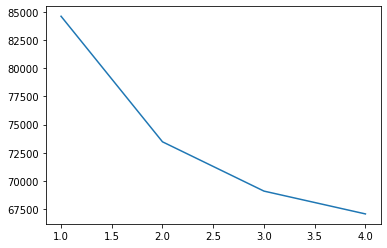

In [106]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

#### Choosing K=3

In [107]:
cao_model = KModes(n_clusters=3, init = "Cao", max_iter=1000, n_init = 50)
cao_fit_cluster = cao_model.fit_predict(final_df)

In [108]:
cao_fit_cluster

array([0, 0, 1, ..., 2, 0, 1], dtype=uint16)

In [109]:
final_df = final_df_copy.reset_index()

In [110]:
cluster_df = pd.DataFrame(cao_fit_cluster)
cluster_df.columns = ['predicted_cluster']
combined_df = pd.concat([final_df, cluster_df], axis = 1).reset_index()
combined_df = combined_df.drop(['index', 'level_0'], axis = 1)

In [111]:
combined_df.head()

,Location,Day,Elements,Rating,BMS,Qty,Area,Main Category,Timeslot,Time Taken,Efficiency,predicted_cluster
0,Stamford,Monday,Call Up Next Customer & Start Transaction,100.0,5.0,1.0,Main Till Bank,Customer,Morning,0.0,5.0,0
1,Stamford,Monday,Serve Customer at Collections/Click&Collect,100.0,5.0,1.0,Collections Desk,Customer,Morning,0.0,5.0,0
2,Stamford,Monday,Customer Count,0,0.0,1.0,Collections Desk,NVA,Morning,0.0,0.0,1
3,Stamford,Monday,Customer Count,0,0.0,1.0,Main Till Bank,NVA,Morning,0.0,0.0,1
4,Stamford,Monday,Deal with Store Visit RM / AM etc,100.0,5.0,1.0,Collections Desk,Task & Process,Morning,5.0,0.0,2


In [112]:
combined_df['predicted_cluster'].value_counts()

0    7441
1    3311
2    2882
Name: predicted_cluster, dtype: int64

In [113]:
cluster_0 = combined_df[combined_df['predicted_cluster'] == 0]
cluster_1 = combined_df[combined_df['predicted_cluster'] == 1]
cluster_2 = combined_df[combined_df['predicted_cluster'] == 2]

In [114]:
plt.rcParams.update({'font.size': 18})

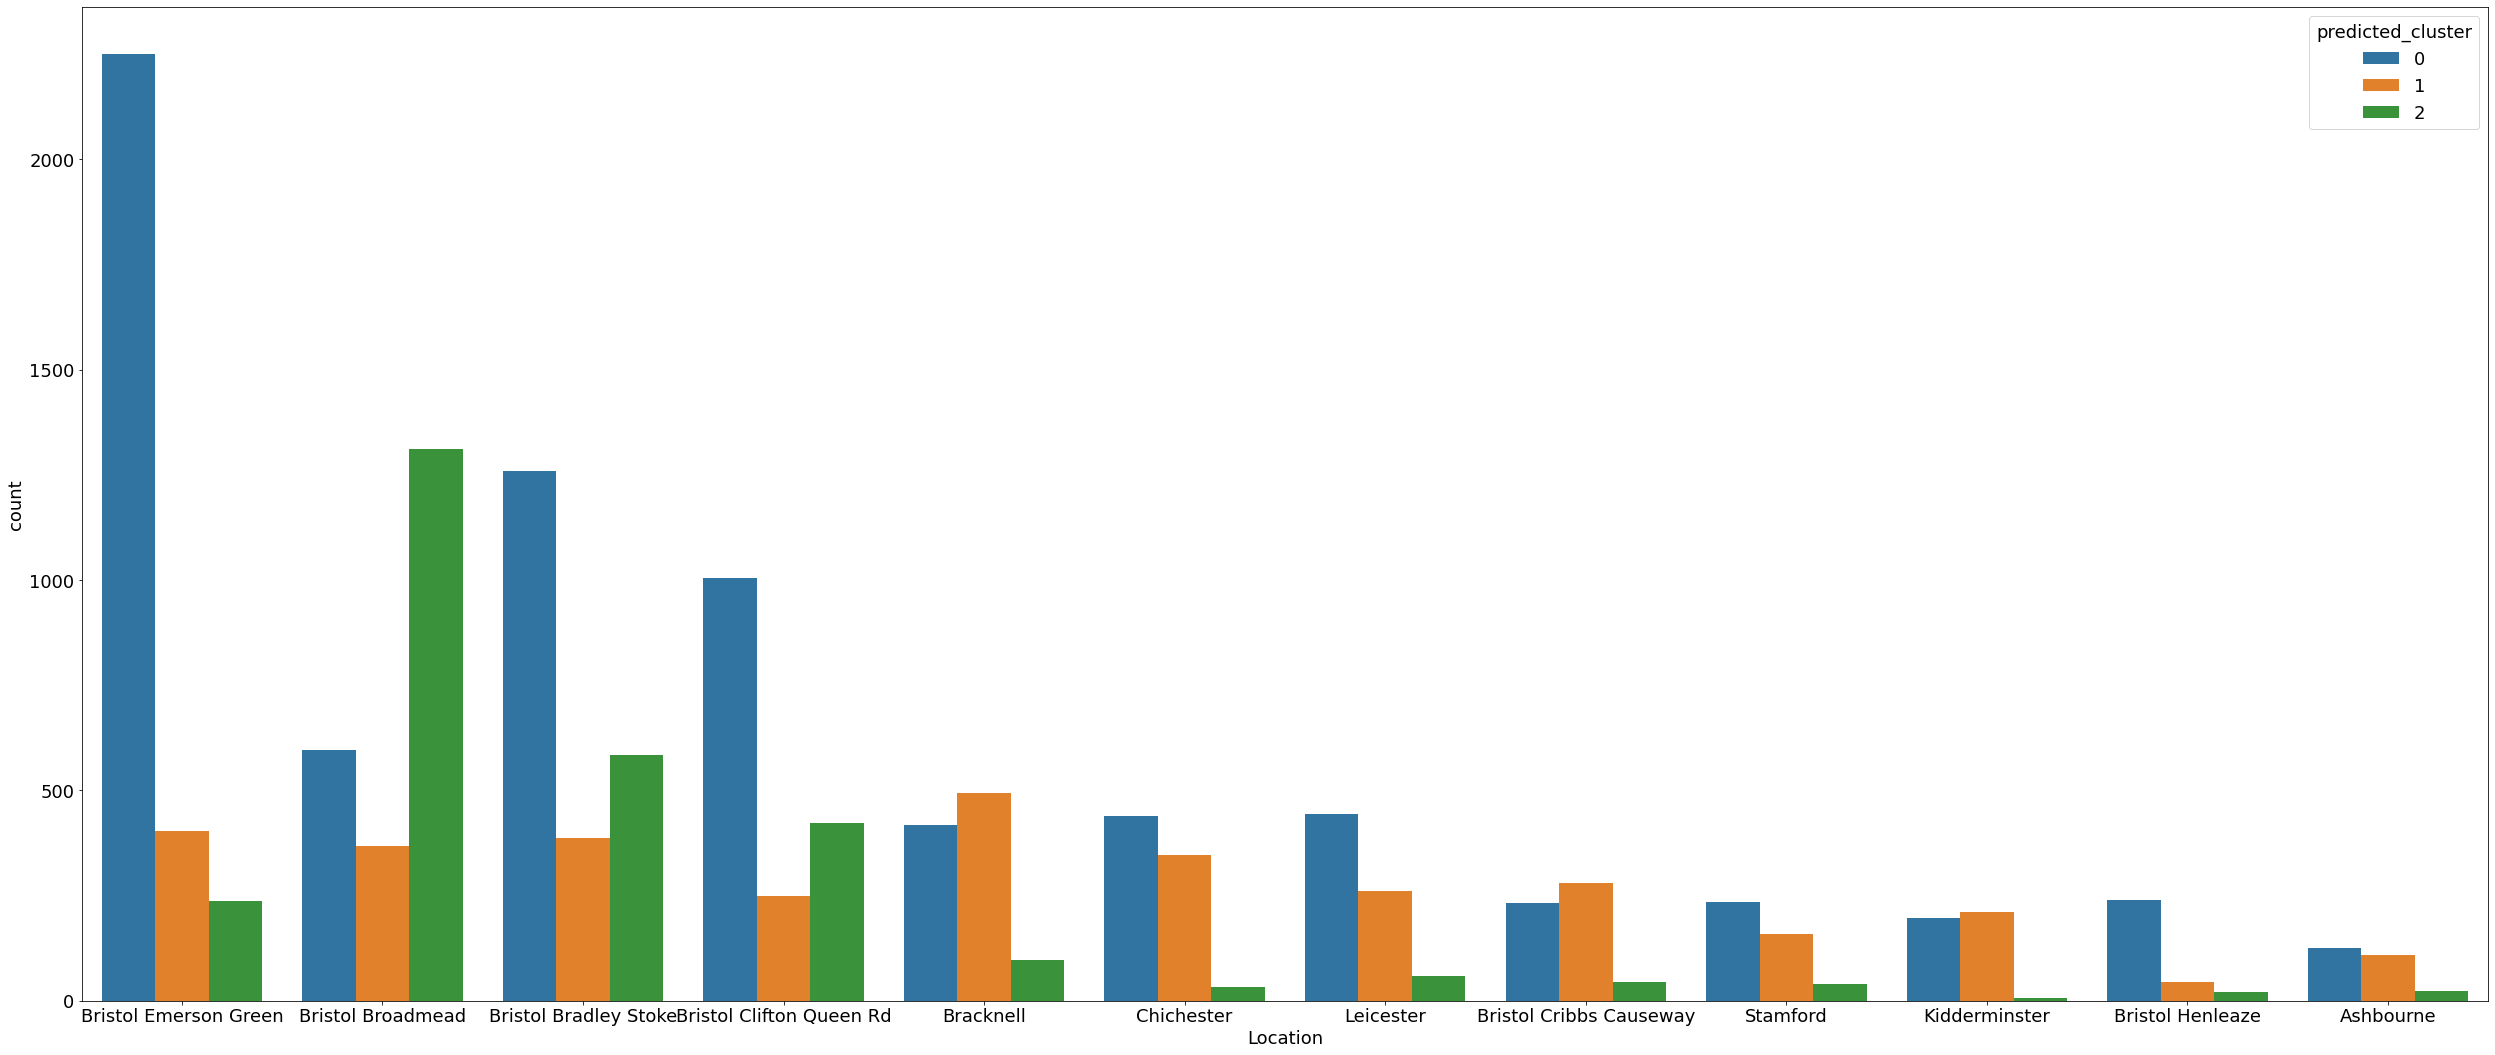

In [115]:
plt.subplots(figsize = (35,15))
sns.countplot(x=combined_df['Location'],order=combined_df['Location'].value_counts().index, hue=combined_df['predicted_cluster'])
plt.tight_layout()
plt.show()

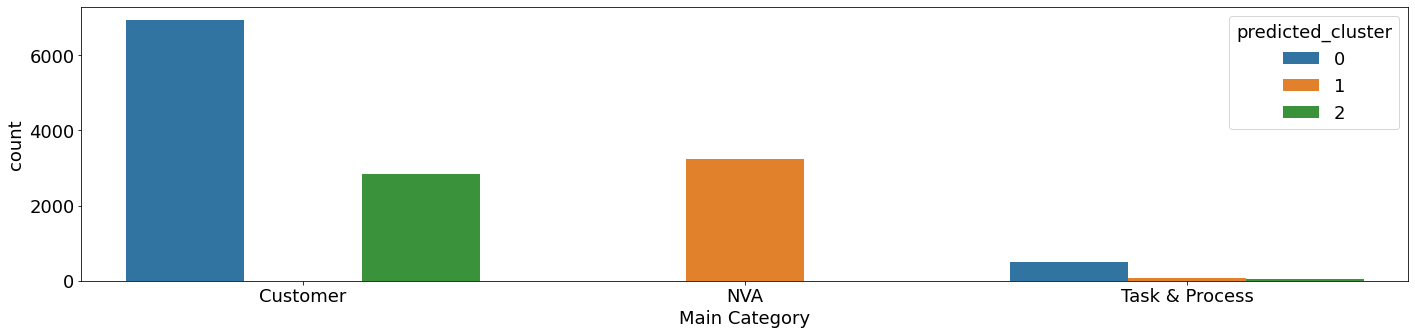

In [116]:
plt.subplots(figsize = (20,5))
sns.countplot(x=combined_df['Main Category'],order=combined_df['Main Category'].value_counts().index, hue=combined_df['predicted_cluster'])
plt.tight_layout()
plt.show()